# implementation is based on https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

In [36]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import matplotlib as mpl
from sklearn.svm import SVC 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [37]:
# load the reduced LDA train dataset

df = pd.read_csv('final_train.csv')
# load only first two columns 
# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
X_train = df.iloc[:, 0:2]
X_train

,LDA1,LDA2
0,-1.231498,0.213996
1,2.495080,-0.404526
2,-0.934255,0.187958
3,-0.252536,0.490760
4,-0.407214,-0.189248
...,...,...
9995,-1.141336,0.226900
9996,-0.772062,0.070803
9997,-0.105971,1.345957
9998,-0.686373,0.342833


In [38]:
# load the reduced LDA test dataset
df_i = pd.read_csv('final_test.csv')
X_test = df_i.iloc[:, 0:2]
X_test

,LDA1,LDA2
0,0.812077,0.248751
1,-0.911020,0.433027
2,-0.094158,1.608926
3,0.001661,0.065771
4,-0.255480,1.482105
...,...,...
4995,-1.125208,1.307815
4996,3.475919,-0.314530
4997,-0.322823,-1.328581
4998,-0.263337,0.664617


In [39]:
# https://pythonbasics.org/pickle/

# import the pickeled train labels
import pickle
train_label_obj = open('train_labels.obj', 'rb')
Y_train = pickle.load(train_label_obj)
train_label_obj.close()

In [40]:
    # https://pythonbasics.org/pickle/

# import the pickeled test labels
test_label_obj = open('test_labels.obj', 'rb')
Y_test = pickle.load(test_label_obj)
test_label_obj.close()

# Gridsearch

In [16]:
#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
# perform grid search
from sklearn.model_selection import GridSearchCV 
  
# define parameters for the grid search
param_grid = {'C': [0.001,0.01, 0.1, 1, 10], 
              'kernel': ['linear', 'rbf', 'poly'], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  
  
grid = GridSearchCV(SVC(), param_grid, verbose = 3, refit=True, cv=5) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.754 total time=   2.9s
[CV 2/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.743 total time=   2.3s
[CV 3/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.754 total time=   2.3s
[CV 4/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.759 total time=   2.3s
[CV 5/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.744 total time=   2.2s
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.708 total time=  10.4s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.667 total time=   8.1s
[CV 3/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.687 total time=   9.4s
[CV 4/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.695 total time=   8.1s
[CV 5/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.678 total time=   8.0s
[CV 1/5] END .....C=0.001, gamma=1, kernel=poly;, score=0.659 total time=   1.9s
[CV 2/5] END .....C=0.001, gamma=1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [17]:
# print the best parameters
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [18]:
# save the model object (to prevent running the grid search all the time)
# https://pythonbasics.org/pickle/
#filename = 'finalized_model.obj'
#pickle.dump(grid, open(filename, 'wb'))

In [19]:
#open the pickeled model
# https://pythonbasics.org/pickle/
#filename = 'finalized_model.obj'
#loaded_model = pickle.load(open(filename, 'rb'))

In [42]:
# make prediction on the test set
grid_predictions = grid.predict(X_test)

In [43]:
# save the test set with the true labels
df = pd.DataFrame({'true label': Y_test, 'predicted': grid_predictions})

# Confusion matrix and precision, recall, F1 score for the test set

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

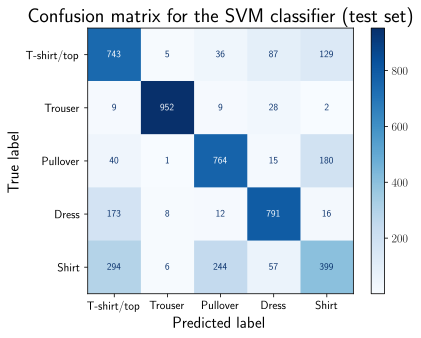

In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# confusion matrix for the test set 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(20,20))
cm = confusion_matrix(df['true label'], df['predicted'],labels=['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Shirt'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Shirt'])
disp.plot(cmap='Blues')
plt.title('Confusion matrix for the SVM classifier (test set)')
plt.savefig("confusion_svm.png", dpi=300, bbox_inches='tight')
plt.show()

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(df['true label'], df['predicted'], labels=['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Shirt'])

(array([0.59015091, 0.97942387, 0.71737089, 0.80879346, 0.54958678]),
 array([0.743, 0.952, 0.764, 0.791, 0.399]),
 array([0.65781319, 0.96551724, 0.73995157, 0.79979778, 0.46234067]),
 array([1000, 1000, 1000, 1000, 1000], dtype=int64))

In [46]:
# make prediction on the train set
grid_predictions_train = grid.predict(X_train)


In [47]:
# save the predictions and true labels of train labels
df_train = pd.DataFrame({'true label': Y_train, 'predicted': grid_predictions_train})

# Confusion matrix and precision, recall, F1 score for the train set

<Figure size 2000x2000 with 0 Axes>

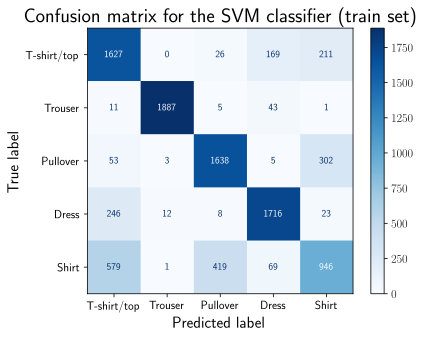

In [48]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# confusion matrix for the train set 

plt.figure(figsize=(20,20))
cm = confusion_matrix(df_train['true label'], df_train['predicted'],labels=['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Shirt'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Shirt'])
disp.plot(cmap='Blues')
plt.title('Confusion matrix for the SVM classifier (train set)')
plt.savefig("confusion_svm_train.png", dpi=300, bbox_inches='tight')
plt.show()

In [49]:
precision_recall_fscore_support(df_train['true label'], df_train['predicted'], labels=['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Shirt'])


(array([0.64666137, 0.99159222, 0.78148855, 0.85714286, 0.63789616]),
 array([0.80029513, 0.96918336, 0.8185907 , 0.85586035, 0.46971202]),
 array([0.71532205, 0.98025974, 0.79960947, 0.85650112, 0.54103517]),
 array([2033, 1947, 2001, 2005, 2014], dtype=int64))

# Plot decision boundary

In [50]:
from mlxtend.plotting import plot_decision_regions
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [51]:
#https://stackoverflow.com/questions/46194971/add-legend-names-to-a-svm-plot-in-matplotlib
#https://stackoverflow.com/questions/8023306/get-key-by-value-in-dictionary?page=2&tab=votes
# turn X_test to np array
X_test = np.array(X_test)
# turn Y_test to np array and map the labels into numbers
fashion_dictionary = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                      4: 'Shirt'}
# invert the dictionary so the keyes are the labels
fashion_dict = {v: k for k, v in fashion_dictionary.items()}
Y_test = [fashion_dict[i] for i in Y_test]

# y to np array
Y_test = np.array(Y_test)

In [35]:
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
svm = SVC(kernel='rbf', C=10, gamma=0.01)
svm.fit(X_test, Y_test)
fig = plt.figure(figsize=(10,10))
# labels for the legends in dictionary 
labels = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Shirt']
plot_decision_regions(X_test, Y_test, clf=svm, legend=2)
plt.title('SVM Decision Region Boundary')
#https://stackoverflow.com/questions/46194971/add-legend-names-to-a-svm-plot-in-matplotlib
L = plt.legend()
L.get_texts()[0].set_text('T-shirt/top')
L.get_texts()[1].set_text('Trouser')
L.get_texts()[2].set_text('Pullover')
L.get_texts()[3].set_text('Dress')
L.get_texts()[4].set_text('Shirt')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.savefig("svm_decision_boundary.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Petrb\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
